In [1]:
import sympy as sym

import numpy as np

import itertools

sym.init_printing()

In [2]:
import evol_dynamics

In [3]:
import matplotlib.pyplot as plt
import matplotlib

from collections import Counter

In [4]:
from tqdm import tqdm

In [5]:
import pandas as pd

In [6]:
s_one = (0, 0, 0)
s_two = (1, 1, 0)

In [7]:
payoff_vector = np.array(evol_dynamics.donation_game(1, 3))

In [8]:
evol_dynamics.steady_state(s_two, s_one, delta=0.999) @ payoff_vector 

**Defining variables**

In [9]:
y_1, p_1, q_1 = sym.symbols("y_1, p_1, q_1")
y_2, p_2, q_2 = sym.symbols("y_2, p_2, q_2")

In [10]:
s_one = (y_1, p_1, q_1)
s_two = (y_2, p_2, q_2)

In [11]:
s_one

In [12]:
combinations = itertools.product([s_one, s_two], repeat=2)

In [13]:
list(combinations)

**Get expression using code**

In [14]:
d = sym.symbols("delta")

In [15]:
v_zero = evol_dynamics.expected_distribution_opening_round(s_one, s_two)

In [16]:
v_zero

In [17]:
M = evol_dynamics.markov_chain_for_reactive_strategies(s_one, s_two)

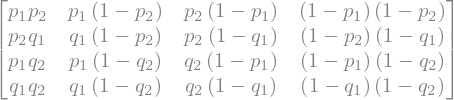

In [18]:
sym.Matrix(M)

In [19]:
inverse = sym.Matrix(np.identity(4) - d * M).inverse_ADJ()

In [20]:
expression = (1 - d) * sym.Matrix(v_zero).reshape(1, 4) @ inverse

**Check the written mathematics**

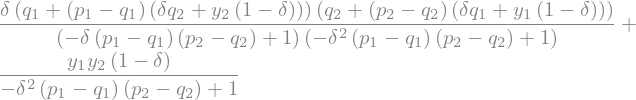

In [21]:
u_R = evol_dynamics.formulation.probability_being_in_state_R(s_one, s_two, d)
u_R

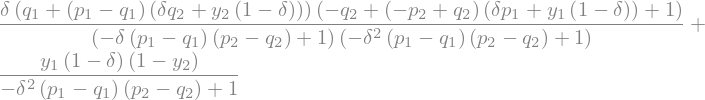

In [22]:
u_S = evol_dynamics.formulation.probability_being_in_state_S(s_one, s_two, d)
u_S

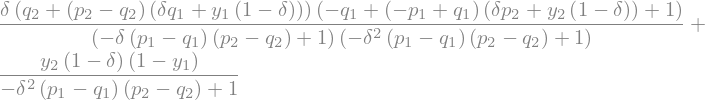

In [23]:
u_T = evol_dynamics.formulation.probability_being_in_state_T(s_one, s_two, d)
u_T

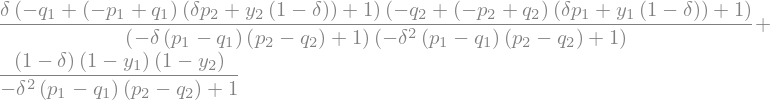

In [24]:
u_P = evol_dynamics.formulation.probability_being_in_state_P(s_one, s_two, d)
u_P

In [25]:
(u_R - expression[0]).simplify(), (u_S - expression[1]).factor()

In [26]:
(u_T - expression[2]).factor(), (u_P - expression[3]).factor()

**Check functions for analysis of ALLD into GTFT**

In [27]:
q = sym.symbols("q")

N, k = sym.symbols("N, k")

In [28]:
ALLD = (0, 0, 0)
GTFT = (1, 1, q)

**States of Eq. (9) and (10)**

In [29]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, GTFT, d).factor()

In [30]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [31]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [32]:
evol_dynamics.formulation.probability_being_in_state_T(ALLD, GTFT, d).factor()

In [33]:
(
    evol_dynamics.formulation.probability_being_in_state_S(GTFT, GTFT, d).factor(),
    evol_dynamics.formulation.probability_being_in_state_T(GTFT, GTFT, d).factor(),
    evol_dynamics.formulation.probability_being_in_state_P(GTFT, GTFT, d).factor(),
)

In [34]:
evol_dynamics.formulation.probability_being_in_state_R(
    ALLD, GTFT, d
).factor(), evol_dynamics.formulation.probability_being_in_state_S(ALLD, GTFT, d).factor()

In [35]:
evol_dynamics.formulation.probability_being_in_state_T(
    ALLD, GTFT, d
).factor(), evol_dynamics.formulation.probability_being_in_state_P(ALLD, GTFT, d).factor()

**Simulations** - **Example in notes**

**Plotting simulation results**

In [36]:
columns = [
    "R",
    "S",
    "T",
    "P",
    "N",
    "delta",
    "beta",
    "mode",
    "cooperation",
    "score",
    "y",
    "p",
    "q",
]

In [37]:
exp = pd.read_csv("data/expected_donation_payoffs.csv", header=None)

In [38]:
exp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,-1,3,0,100,0.999,1,expected,0.0,0.0,0.0,0.0,0.0
1,2,-1,3,0,100,0.999,1,expected,0.0,0.0,0.0,0.0,0.0
2,2,-1,3,0,100,0.999,1,expected,0.0,0.0,0.0,0.0,0.0
3,2,-1,3,0,100,0.999,1,expected,0.0,0.0,0.0,0.0,0.0
4,2,-1,3,0,100,0.999,1,expected,0.0,0.0,0.0,0.0,0.0


In [39]:
exp.columns = columns

In [40]:
exp.describe()

,R,S,T,P,N,delta,beta,cooperation,score,y,p,q
count,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0,1.000000e+07,10000000.0,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,5.202264e-01,1.040453e+00,5.102020e-01,5.735165e-01,1.919568e-01
std,0.0,0.0,0.0,0.0,0.0,1.776357e-14,0.0,4.376567e-01,8.753134e-01,2.887977e-01,4.205934e-01,1.602061e-01
min,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,6.183582e-02,1.236716e-01,2.635412e-01,1.313789e-01,5.301411e-02
50%,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,5.118562e-01,1.023712e+00,5.118233e-01,7.002917e-01,1.455091e-01
75%,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,9.749307e-01,1.949861e+00,7.579130e-01,9.937596e-01,3.183477e-01
max,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,9.999879e-01,1.999976e+00,9.999820e-01,9.999971e-01,9.999932e-01


In [41]:
import matplotlib.colors as colors

In [42]:
x, y = evol_dynamics.numerical._reshape_data(exp)

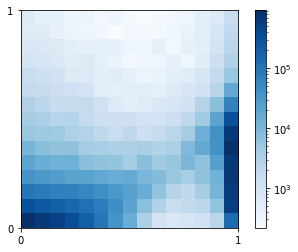

In [43]:
cmap = matplotlib.cm.get_cmap("Blues")

heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, cmap=cmap, origin="lower", norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))

plt.colorbar()
plt.xticks(np.linspace(0, 1, 2))
plt.yticks(np.linspace(0, 1, 2))
plt.show()

In [44]:
stoch = pd.read_csv("data/stochastic_donation_payoffs.csv", header=None)

In [45]:
stoch.columns = columns

In [46]:
stoch.describe()

,R,S,T,P,N,delta,beta,cooperation,score,y,p,q
count,4166024.0,4166024.0,4166024.0,4166024.0,4166024.0,4.166024e+06,4166024.0,4.166024e+06,4.166024e+06,4.166024e+06,4.166024e+06,4.166024e+06
mean,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,3.611682e-01,7.223365e-01,5.090089e-01,4.362310e-01,1.353571e-01
std,0.0,0.0,0.0,0.0,0.0,9.880986e-15,0.0,4.012854e-01,8.025709e-01,2.875884e-01,3.949447e-01,1.407220e-01
min,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,3.591608e-02,7.183217e-02,2.622362e-01,9.666156e-02,3.106230e-02
50%,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,1.109791e-01,2.219583e-01,5.152638e-01,2.426926e-01,8.371367e-02
75%,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,8.891130e-01,1.778226e+00,7.587495e-01,9.687395e-01,1.976921e-01
max,2.0,-1.0,3.0,0.0,100.0,9.990000e-01,1.0,9.998542e-01,1.999708e+00,9.999820e-01,9.999955e-01,9.999430e-01


In [47]:
x, y = evol_dynamics.numerical._reshape_data(stoch)

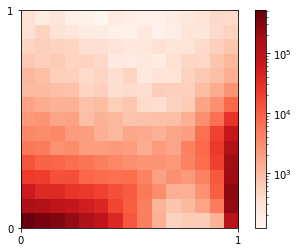

In [48]:
cmap = matplotlib.cm.get_cmap("Reds")

heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, cmap=cmap, origin="lower", norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))

plt.colorbar()
plt.xticks(np.linspace(0, 1, 2))
plt.yticks(np.linspace(0, 1, 2))
plt.show()

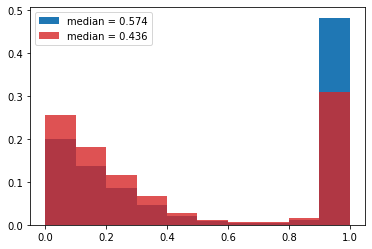

In [49]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["p"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [50]:
from scipy import stats

In [51]:
tStat, pStat = stats.ttest_ind(exp["p"], stoch["p"], equal_var=False)

In [52]:
pStat

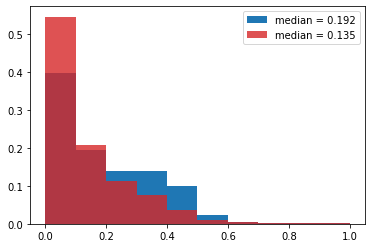

In [53]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["q"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [54]:
tStat, pStat = stats.ttest_ind(exp["q"], stoch["q"], equal_var=False)
pStat

# Distributions of cooperation

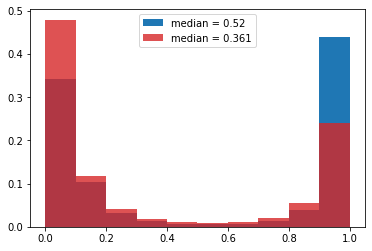

In [58]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["cooperation"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [57]:
tStat, pStat = stats.ttest_ind(exp["cooperation"], stoch["cooperation"], equal_var=False)
pStat